In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="darkgrid")

In [5]:
import os
print(os.getcwd())

C:\Users\user\data\Desktop\omid-c19


In [7]:
# Load the dataset (make sure the file is in the same folder)
df = pd.read_csv(r"C:\Users\user\owid-covid-data.csv")

# Check the structure
print(df.shape)
df.head()

(429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [8]:
# Drop rows with no country name or iso_code
df = df.dropna(subset=['iso_code', 'location'])

# Filter out rows with missing total_cases or total_deaths
df_clean = df.dropna(subset=['total_cases', 'total_deaths'])

# Focus only on countries (ignore aggregates like 'World', 'Asia', etc.)
df_clean = df_clean[df_clean['iso_code'].str.len() == 3]

# Convert 'date' column to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Preview cleaned data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390042 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    390042 non-null  object        
 1   continent                                   390042 non-null  object        
 2   location                                    390042 non-null  object        
 3   date                                        390042 non-null  datetime64[ns]
 4   total_cases                                 390042 non-null  float64       
 5   new_cases                                   388397 non-null  float64       
 6   new_cases_smoothed                          387232 non-null  float64       
 7   total_deaths                                390042 non-null  float64       
 8   new_deaths                                  388846 non-null  float64      

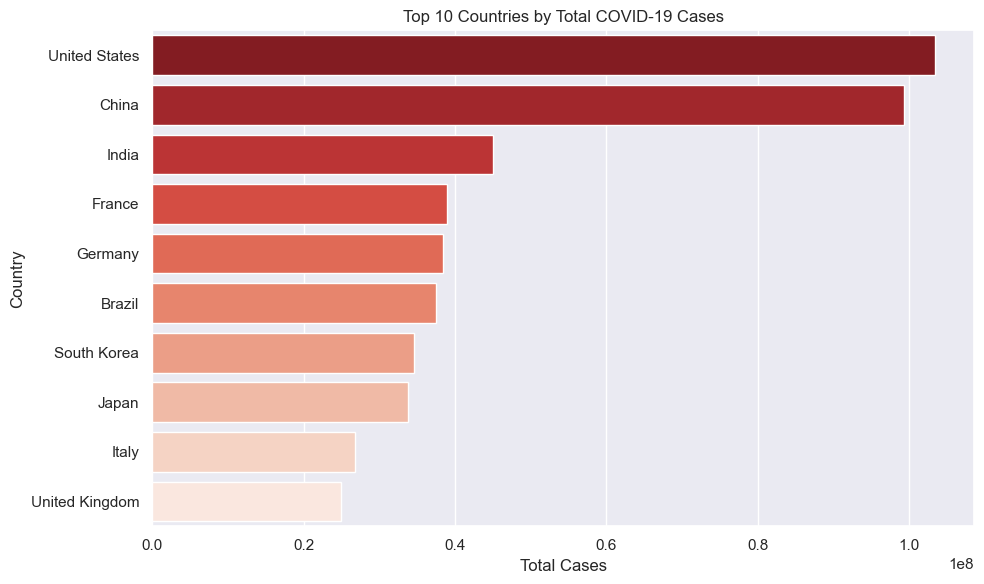

In [9]:
latest = df_clean[df_clean['date'] == df_clean['date'].max()]
top10_cases = latest.sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_cases', y='location', data=top10_cases, palette="Reds_r")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

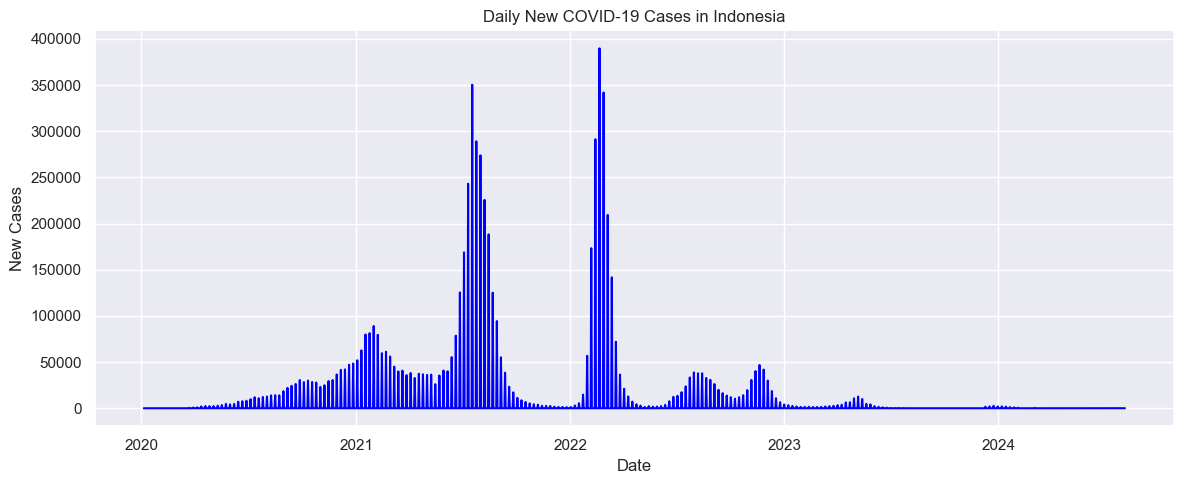

In [10]:
indo = df_clean[df_clean['location'] == "Indonesia"]

plt.figure(figsize=(12, 5))
plt.plot(indo['date'], indo['new_cases'], color='blue')
plt.title("Daily New COVID-19 Cases in Indonesia")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tight_layout()
plt.show()

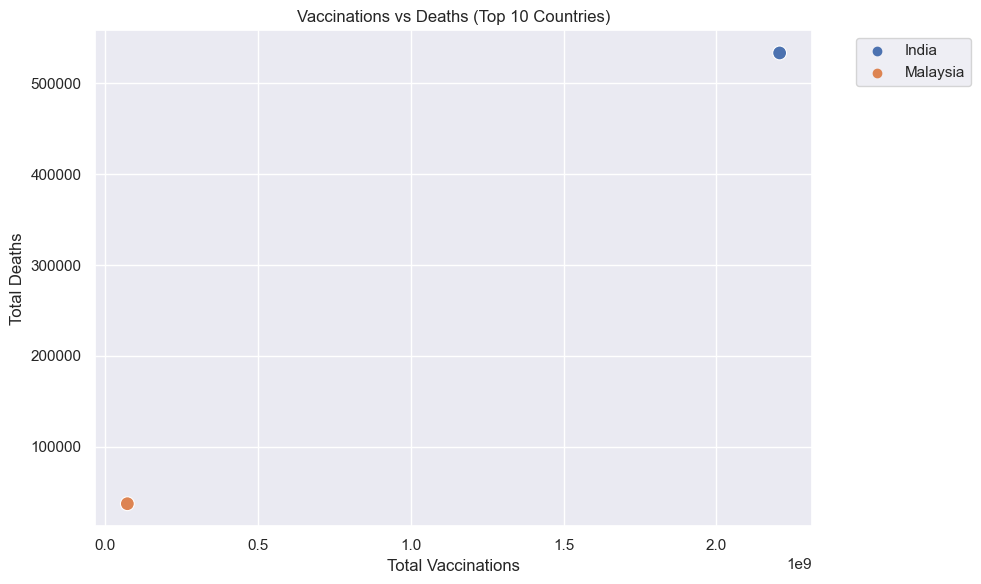

In [11]:
vacc_df = latest.dropna(subset=['total_vaccinations'])
top_vacc = vacc_df.sort_values(by='total_vaccinations', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_vaccinations', y='total_deaths', data=top_vacc, hue='location', s=100)
plt.title("Vaccinations vs Deaths (Top 10 Countries)")
plt.xlabel("Total Vaccinations")
plt.ylabel("Total Deaths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
df.to_csv("cleaned_covid_data.csv", index=False)
print("Cleaned CSV saved.")

Cleaned CSV saved.
